# **Long Notebook**
Kaggle competition name: Moscow Housing

Kaggle team name: Hanniballene

Student group number: 9


- Styrk Hundseid Kamsvåg, 506770
- Eirik Jakobsen Daltveit, 490082
- Gunnar Hannibal Sökjer-Petersen, 490777

In [2]:
#Start with all our imports:
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
#from feature_engineering import add_retning
from sklearn.model_selection import train_test_split
import pandas as pd
import sys
import lightgbm as lgb
import sklearn as skl
import string
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
sys.path.append('../data')

from display_data import import_data

## **EXPLORATORY DATA ANALYSIS**

We have done a lot of exploratory data analysis and feature engineering. Below you can see all the functions we have made with associated comments. These comments explain what the functions do and why we have made them. Some of the functions clean up the data, some functions add features and some are helper functions.

First we started with importing the data:

In [6]:
#import data
#import data
data_train, data_test = import_data()

#sometimes we have to look at all the data togheter
all_data = pd.concat([data_train,data_test],ignore_index=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33222 entries, 0 to 33221
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33222 non-null  int64  
 1   seller              20450 non-null  float64
 2   price               23285 non-null  float64
 3   area_total          33222 non-null  float64
 4   area_kitchen        26268 non-null  float64
 5   area_living         27321 non-null  float64
 6   floor               33222 non-null  float64
 7   rooms               33222 non-null  float64
 8   layout              8212 non-null   float64
 9   ceiling             17111 non-null  float64
 10  bathrooms_shared    27633 non-null  float64
 11  bathrooms_private   27633 non-null  float64
 12  windows_court       21662 non-null  float64
 13  windows_street      21662 non-null  float64
 14  balconies           17867 non-null  float64
 15  loggias             17867 non-null  float64
 16  cond

### **Features Description**
After importing the data, we made a quick features description

In [4]:
#Now lets look at all the basics of the data
print('Number of Training Examples = {}'.format(data_train.shape[0]))
print('Number of Test Examples = {}\n'.format(data_test.shape[0]))
print('Training X Shape = {}'.format(data_train.shape))
print('Training y Shape = {}\n'.format(data_train['price'].shape[0]))
print('Test X Shape = {}'.format(data_test.shape))
print('Test y Shape = {}\n'.format(data_test.shape[0]))
print('Train columns \n', list(data_train.columns))
print('Test columns \n', list(data_test.columns))

#check type of each column, and see how many duplicates we have:
for column in data_train.columns:
    print('\n - type of column: ', data_train.dtypes[column],'\n - number of null values: ', data_train[column].isnull().sum(), '\n - number of unique inputs: ', data_train[column].value_counts().count())


Number of Training Examples = 23285
Number of Test Examples = 9937

Training X Shape = (23285, 34)
Training y Shape = 23285

Test X Shape = (9937, 33)
Test y Shape = 9937

Train columns 
 ['id', 'seller', 'price', 'area_total', 'area_kitchen', 'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 'constructed', 'material', 'stories', 'elevator_without', 'elevator_passenger', 'elevator_service', 'parking', 'garbage_chute', 'heating']
Test columns 
 ['id', 'seller', 'area_total', 'area_kitchen', 'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 'constructed', 'material', 'stories', 'el

### **Features**
After running the above code, we resulted in the following descriptions

* `id` - Unique ID for apartment
    - type of column:  int64
    - number of null values:  0
    - number of unique inputs:  23285
* `seller` - The type of apartment seller
 - type of column:  float64
 - number of null values:  8830
 - number of unique inputs:  4
* `price` - The listed price of the apartment (TARGET: only available in train)
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  9504
* `area_total` - Total area of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  3249
* `area_kitchen` - Total kitchen area in the apartment
 - type of column:  float64
 - number of null values:  4721
 - number of unique inputs:  385
* `area_living` - Total living space area in the apartment
 - type of column:  float64
 - number of null values:  3882
 - number of unique inputs:  1041
* `floor`- Primary building floor of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  84
* `rooms` - Number of rooms in the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6
* `layout` - Overal apartment layout
 - type of column:  float64
 - number of null values:  17642
 - number of unique inputs:  3
* `ceiling` - Ceiling height in the apartment
 - type of column:  float64
 - number of null values:  11093
 - number of unique inputs:  121
* `bathrooms_shared` - Number of shared bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `bathrooms_private` - Number of private bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `windows_court` - Whether the apartment has windows facing a courtyard
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `windows_street` - Whether the apartment has windows facing a street
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `balconies` - Number of balconies in the apartment
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `loggias`- Number of loggias in the apartment (balcony-like, google it)
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `condition` - Current condition of the apartment
 - type of column:  float64
 - number of null values:  9810
 - number of unique inputs:  4
* `phones` - Number of phone numbers associated with the advert
 - type of column:  float64
 - number of null values:  80
 - number of unique inputs:  3
* `building_id` - ID used to map apartments to buildings
 - type of column:  int64
 - number of null values:  0
 - number of unique inputs:  6791
* `new` - Whether it is an old or new building
 - type of column:  float64
 - number of null values:  264
 - number of unique inputs:  2
* `latitude` - Latitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6208
* `longitude` - Longitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6159
* `district` - Administriative district within Moscow
 - type of column:  float64
 - number of null values:  130
 - number of unique inputs:  12
* `street` - Bulding street name
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1682
* `address` - Building address (within street)
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1851
* `constructed` - Year when the building was constructed
 - type of column:  float64
 - number of null values:  794
 - number of unique inputs:  128
* `material` - Primary building material used in building
 - type of column:  float64
 - number of null values:  3972
 - number of unique inputs:  7
* `stories` - Total number of floors in the building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  62
* `elevator_without` - Whether the building has apartments without elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_passenger` - Whether the building has apartments with passenger elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_service` - Whether the building has apartments with service elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `parking` - Parking options for building
 - type of column:  float64
 - number of null values:  6788
 - number of unique inputs:  3
* `garbage_chute` - Whether the building has a garbage chute system
 - type of column:  float64
 - number of null values:  8811
 - number of unique inputs:  2
* `heating` - Primary heating system used in the building
 - type of column:  float64
 - number of null values:  8161
 - number of unique inputs:  4

### **Categorical Features**
We identified the following features as categorical:
- seller
- layout
- windows_court
- windows_street
- condition
- phones
- building_id
- new
- district
- street and address
- constructed
- material
- elevator
- parking
- garbage_chute
- heating

However some models preferred to have other features as categorical aswell, like rooms and bathrooms. We will get back to this later.

All these features will mislead the models if they are not defined as categorical values.

### **General domain knowledge**
Going into this project we had some domain knowledge about the housing market in general, and we aqquired som spesific domain knowledge about the Moscow Housing market.

We knew that location is usually very important. This can be different for each city, as some cities may have expensive suburbs located outside of the city or exspensive regions within the city itself. We knew that in order to make good predictions we had to utilize this feature.

The next thing we knew was that the size of the apartment/house is really important. We think this will be the most important feature as there is often correleation between size and price.

Further, the number of rooms is important and the state of the house. We predicted that a newer house often would have a higher standard and better commodities and therefore higher priced.

The floor of the apartment could also matter. Especially if it is high up in a high building. Usually the ground floor apartments are cheaper then the ones at the top.
### **Spesific domain knowledge**
We also did some searches if there was anything special with the russian housing market. The most interesting thing we found was that using the metro is really popular in Moscow. They also like going to the park and going to a good school is really important.
We wanted to use some of this specific knowledge to improve our predictions. That why we went to the internet and found location of all metro stations, most popoular parks and schools. We will use this later.

We also found which parts of moscow which were exclusive and therefore more pricey, but we think it is better that the models learn this themselves.

### **Data generation and intuitive**
With this dataset, there is a lot of inconsistency. When we looked through the dataset one of the first things we noticed were all the NAN-values. Seemingly, the collection of the data has not been done through the same means for every house. The first thing that caught our attention was the number of missing values of the feature seller. We figured that the seller would be responsible for declaring the different features of the apartment, and that they would usually understand the different features. Layout is another feature that is of interest as it is the features with the most NAN-values. The lack of values makes sense to as, as the feature itself did not make sense. In describing an apartment we imagine the person skipping this field for this exact reason. Balconies and loggias also have a high number of NAN-values and they also have the same number of NAN-values. This is either because the question of the apartment having a balcony or loggia might seem irrelevant for some apartments. Additionally, the word loggia might cause some confusion.

There are several features that are inconsistently denoted. area_living, and area_kitchen are mostly given as square meters, but sometimes as a percentage of area_total. To describe the height of the ceiling, meters, decimeters and centimeters have been utilized. How these inconsistencies have been dealt with is explained further down in “Data Cleaning”.

When running through the coordinates we realized that there rows in the data that had coordinates that were not located in Moscow at all. They seemed to have been placed around the world. After that we also realized that it might be hard for the models to interpret latitude and longitude as something to take into account when predicting price.

As written about under domain knowledge, we had some intuition of how the features of the houses should relate to the price. To check this we plotted the correlation of the price and the other features. We saw that as expected area_total was highly correlated with the price. This also applied to area_living and rooms. However, longitude and latitude were not highly correlated, but as shown in the introduction notebook, when combining these to a feature called radius (distance from city centre), the location of the house was highly correlated to the price.

### **Explore individual features**
We wanted to explore some features alone. For ut the most natural thing to do was to start with the price. We also explored other features,
some are presented in data cleaning and intuitive (ceiling, area_kitchen, area_living, longitude,latitude)
#### **Price**
We started with plotting price and saw that there were big difference in the prices, leading to the price having a bad distribution.

<AxesSubplot:ylabel='Frequency'>

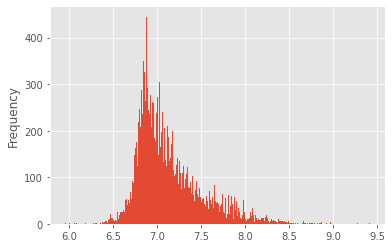

In [8]:
#plot price distribution
data_train.price.plot.hist(bins= 500)

#used log to get a better distribution
data_train['price_log'] = np.log10(data_train.price)

#plot price distribution with log
data_train.price_log.plot.hist(bins=500)

As we can see from the plots the distribution is much better now that we logged the price. We tested with different logs and found out that log15 worked the best for us.
We also saw some extreme values in price, however they could be explained as these were also very big apartmens/houses.

#### **Building_id**
Next we wanted to check out the building id because we thought it could be a good feature to group on and add for example mean_price_building.
We also did this for street name.

However, we quickly realised that this was a dead end.

In [9]:
print('number of common buildind_id:\n',data_train['building_id'].isin(data_test['building_id']).sum())
print('common streets in both sets:\n',data_train[['street']].isin(data_test[['street']]).sum())
print('number of unique streets:', len(all_data['street'].unique()))

number of common buildind_id:
 0
common streets in both sets:
 street    27
dtype: int64
number of unique streets: 1852


As we can see from the output from the previous cell, there is no common building_ids between the test and training set. Meaning that this feature is useless for grouping on.
In addition, street also has very few common streets between test and training and will not be a good feature.

### **Explore pairs and groups**
#### **Grouping**
Next up we wanted to explore if there were possible to group data or use correlation between different data to make better features. to do this we used a so called correlation plot for the entire dataset and made a function which plots for chosen columns.


,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
id,1.000000,-0.052603,-0.027967,-0.015738,-0.020905,-0.016382,0.024773,-0.003967,0.002985,0.008162,-0.024876,-0.026092,-0.007416,-0.033120,0.057141,-0.045375,0.012366,0.055122,-0.015455,-0.052725,-0.019059,-0.001790,-0.008545,-0.023125,0.021253,0.019732,0.018349,-0.003489,0.001351,0.008241,-0.024156,-0.021557
seller,-0.052603,1.000000,0.101015,0.114169,0.382460,-0.054688,0.200700,0.027664,-0.025219,-0.028138,0.126579,0.097050,-0.148643,0.130084,-0.075228,0.062005,-0.019520,-0.234526,-0.000343,0.790485,0.025139,0.008078,0.001686,0.572010,-0.086750,0.325916,-0.134379,0.211802,0.328411,-0.204725,-0.222998,0.087738
price,-0.027967,0.101015,1.000000,0.814829,0.364758,0.707580,0.132206,0.411317,0.130822,0.031640,0.332421,0.133364,-0.005345,0.180263,0.102928,0.024877,0.109338,0.042738,0.052159,-0.089292,0.054341,-0.034022,-0.182404,0.047633,-0.100614,0.086448,0.162024,0.021846,0.024681,-0.199476,0.029171,0.087359
area_total,-0.015738,0.114169,0.814829,1.000000,0.525835,0.908238,0.154123,0.701655,0.138915,0.036523,0.380754,0.227659,0.033830,0.256950,0.100944,0.154961,0.070177,0.066881,0.030091,-0.080325,0.019680,0.004933,-0.118292,0.081003,-0.137156,0.141185,0.167959,0.047670,0.096450,-0.238187,0.010825,0.138557
area_kitchen,-0.020905,0.382460,0.364758,0.525835,1.000000,0.390412,0.165771,0.316543,0.069211,0.012117,0.312293,0.130256,-0.023496,0.157421,-0.074434,0.178316,0.073151,-0.035414,0.005901,0.263295,0.018770,-0.000278,-0.016764,0.380721,-0.104652,0.255480,0.075488,0.156485,0.303741,-0.208266,-0.105753,0.156648
area_living,-0.016382,-0.054688,0.707580,0.908238,0.390412,1.000000,0.094875,0.724326,0.151520,0.034422,0.349816,0.188046,0.074643,0.214452,0.080110,0.147852,0.089282,0.103567,0.030003,-0.160674,0.020253,0.003917,-0.095537,-0.018279,-0.142003,0.098866,0.154498,0.016913,0.043219,-0.219657,0.018657,0.134478
floor,0.024773,0.200700,0.132206,0.154123,0.165771,0.094875,1.000000,0.058872,0.024154,0.008189,0.079292,0.024448,-0.114935,0.119786,-0.051326,0.109784,0.003747,-0.008283,-0.005646,0.133770,0.014273,-0.010054,-0.038466,0.271538,0.001326,0.661474,0.060604,0.184761,0.246350,-0.215459,-0.012574,0.029743
rooms,-0.003967,0.027664,0.411317,0.701655,0.316543,0.724326,0.058872,1.000000,0.187718,0.039430,0.207147,0.302374,0.081035,0.295852,0.120401,0.136311,0.092408,0.070059,0.018164,-0.106185,0.020456,0.009150,-0.096207,-0.038688,-0.135800,0.058696,0.092750,0.015345,0.020973,-0.165002,0.009578,0.078365
layout,0.002985,-0.025219,0.130822,0.138915,0.069211,0.151520,0.024154,0.187718,1.000000,-0.005999,-0.000495,0.121184,0.005437,0.107457,-0.014785,0.037364,0.040491,0.000060,0.020292,-0.004560,0.007657,-0.002857,-0.044148,0.009626,-0.051204,0.042315,-0.026582,0.106278,0.036600,-0.049716,0.018770,0.018772
ceiling,0.008162,-0.028138,0.031640,0.036523,0.012117,0.034422,0.008189,0.039430,-0.005999,1.000000,0.016953,0.008068,0.011096,-0.002414,-0.004163,0.001201,0.002813,0.028909,-0.005247,-0.027104,0.017963,0.011895,-0.023826,-0.009947,-0.010620,0.003292,0.028703,-0.018169,0.002477,-0.025230,-0.015116,-0.005107


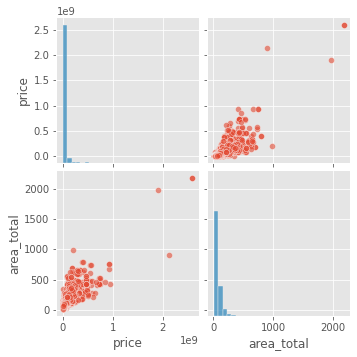

In [11]:
def pair_plot(df, columns):
    #plots a pairplot with the sns libary
    sns.pairplot(df[columns],
    plot_kws={'alpha': 0.6},
    diag_kws={'bins': 30})

pair_plot(data_train,['price', 'area_total'])
all_data.corr().style.background_gradient(cmap='coolwarm')

With the correleation plot we could see which features were interesting to group on. We decided to only group with price as the target feature. To do the actual grouping we made a function which groups data with price as it's target.

In [ ]:
def group_by_feature_and_price(df, feature, data_train = pd.DataFrame()):
    #makes a new column with the mean price for each group to all rows
    if data_train.empty:
        grouped = df.groupby([feature])

        mean_price = grouped['price'].mean()

        df_merged = pd.merge(df,mean_price, on=feature, how='left')

        column_name = str(feature + '_price')

        df[column_name] = df_merged['price_y']
    else:
        grouped = data_train.groupby([feature])

        mean_price = grouped['price'].mean()

        df_merged = pd.merge(df,mean_price, on=feature, how='left')

        column_name = str(feature + '_price')

        df[column_name] = df_merged['price']
    return df

all_data = group_by_feature_and_price(all_data, 'constructed')
all_data = group_by_feature_and_price(all_data, 'district')

all_data.corr().style.background_gradient(cmap='coolwarm')

We applied this to most categorical features, but found the highest increase in correlation with price with district and constructed. This allows the models to better use this the information in these features. In the end we ended up with a different solution, this will be presented in feature engineering.

#### **pairs**
We looked much into pairs regarding imputation of missing data. To do this we made a function to plot the distribution between two categorigal faetures:

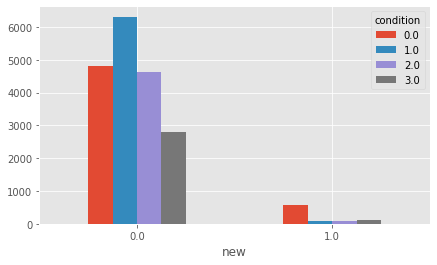

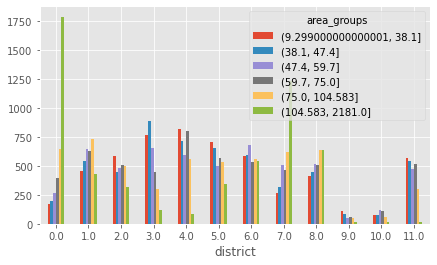

In [13]:
def plot_categorical(df, column1, column2):
    CrosstabResult=pd.crosstab(index=df[column1],columns=df[column2])

    CrosstabResult.plot.bar(figsize=(7,4), rot=0)
#can also group area to use this plot
all_data['area_groups'] = pd.qcut(all_data.area_total, q=6)

plot_categorical(all_data,'new', 'condition')
plot_categorical(all_data, 'district','area_groups')

An example is shown above. we did not manage to use this to find new features, but we got a good understanding of how the different features correleated in pairs.
We can for example see that when a house/apartment is new, it is most likely in a good condition(0) or that most houses in district 0 is really large. Plotting these pairs gave us a good understanding of the domain and helped us in further work. It also

### **Data clean up**
As mentioned in Intuitive we found that some data was not intuitive. We found these errors when wokring with outliers.  This regarded ceiling, area_living, area_kitchen and latitude,longitude.
This data needed to be cleaned up in order to be used by our models. If the data is not structured and cleaned in the right way it will mess it up for the models.

#### **Ceiling**
The first column which needed to be cleaned is ceiling. We discovered these errors when boxplotting ceiling.

<AxesSubplot:>

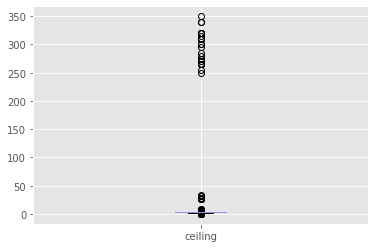

In [14]:
all_data.boxplot(column= 'ceiling')

We can see that are three different 'groups', and we realised that this is because they are given in different measurements (meters, desimeters and centimeters).
To fix this we made a function which fix the issue

<AxesSubplot:>

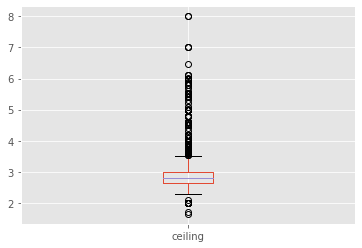

In [15]:
def clean_data(all_data):
    """cleans the data with all the knowledge we have so far"""


    #fix ceiling issues
    all_data.loc[all_data['ceiling'] > 50,'ceiling']*=0.01
    all_data.loc[all_data['ceiling'] > 25, 'ceiling']*=0.1
    all_data.loc[all_data['ceiling'] < 0.5,'ceiling'] = float('NaN')

    return all_data
all_data = clean_data(all_data)
all_data.boxplot(column= 'ceiling')

Now we can see that the data is much better, however there is still some outliers, but after checking these houses we learned that this is because they most likely have several floors.

#### **Latitude,Longitude**
We also found some houses with wrong coordinates (only in test data). We found these by adding radius, which will be described in the feature engineering, and see if any apartmens was too far away from moscow centrum.
To fix this we had to check the streets and adresses of the buildings which had wrong cordinates, and then manually insert these for each row. The result of this work can be seen in our function:

In [ ]:
def fix_geo_data(data_test):
    """should just be called on test data"""
    #fix all radius issues
    data_test._set_value(23,'longitude',37.473761)
    data_test._set_value(23,'latitude',55.560891)
    data_test._set_value(90,'longitude',37.473761)
    data_test._set_value(90,'latitude',55.560891)

    data_test._set_value(2511,'longitude',37.478055)
    data_test._set_value(2511,'latitude',55.544046)
    data_test._set_value(5090,'longitude',37.478055)
    data_test._set_value(5090,'latitude',55.544046)
    data_test._set_value(6959,'longitude',37.478055)
    data_test._set_value(6959,'latitude',55.544046)
    data_test._set_value(8596,'longitude',37.478055)
    data_test._set_value(8596,'latitude',55.544046)

    data_test._set_value(4719,'longitude',37.385493)
    data_test._set_value(4719,'latitude',55.853117)

    data_test._set_value(9547,'longitude',37.384711)
    data_test._set_value(9547,'latitude',55.853511)

    data_test._set_value(2529,'longitude',37.464994)
    data_test._set_value(2529,'latitude',55.627666)

    return data_test

#### **Area living and kitchen**
When testing different models we realised that the models performed better when we left out area_kitchen and area_living.
We therefore made a column called living which indicates the relationship between area_total and area_living, we expect this to be below 1 because area_living shouldn't be bigger than area_toal.

       area_living  area_kitchen  area_total  rooms  bathrooms_private
514           80.0          20.0        37.0    1.0                0.0
515           80.0          20.0        32.0    1.0                0.0
517           80.0          20.0        77.2    3.0                0.0
523           80.0          20.0        77.0    3.0                0.0
536           80.0          20.0        23.3    1.0                0.0
...            ...           ...         ...    ...                ...
28269         44.1           6.0        33.0    1.0                1.0
28270         44.1           6.0        36.5    1.0                1.0
32830         75.0          18.0        35.0    1.0                0.0
33027         33.3          11.9        32.0    1.0                1.0
33092         40.0          14.0        35.0    1.0                1.0

[185 rows x 5 columns]


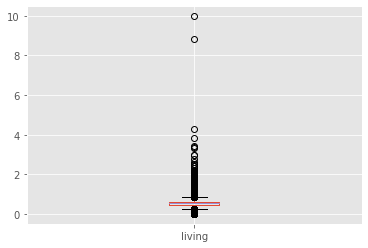

In [16]:
all_data['living'] = all_data.area_living/all_data.area_total

all_data.boxplot(column='living')
#I expected this number to be less than 1, looking at the boxplot this doesnt give much sense
print(all_data[all_data['living']>1][['area_living','area_kitchen','area_total','rooms','bathrooms_private']])

As we can see there is a lot of rows where 'living' is larger than 1. If we look at the plotted values we can see that it is quite clear that some of these rows is given in percentage. In addition, this will only find the rows which has errors and has a low area_total.
We tried to look a lot at this and fix it, but we couldn't make anything that made our models perfrom better. Below is our attempt at fixing this.

In [ ]:
def clean_data(all_data):
    """cleans the data with all the knowledge we have so far"""


    #fix ceiling issues
    all_data.loc[all_data['ceiling'] > 50,'ceiling']*=0.01
    all_data.loc[all_data['ceiling'] > 25, 'ceiling']*=0.1
    all_data.loc[all_data['ceiling'] < 0.5,'ceiling'] = float('NaN')

    #fix area_kitchen and area_living issues
    all_data['living'] = all_data.area_living/all_data.area_total
    all_data['kitchen'] = all_data.area_total/all_data.area_kitchen

    all_data.loc[all_data['living'] > 1,'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['living'] > 1,'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

    all_data.loc[all_data.area_living/all_data.area_total > 1, 'area_living'] = float('NaN')

    all_data['living'] = all_data.area_living/all_data.area_total
    all_data['kitchen'] = all_data.area_kitchen/all_data.area_total

    all_data['sum_area'] = all_data.area_living + all_data.area_kitchen
    all_data.loc[all_data['sum_area'] == 100, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 100, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

    #this fixed some few rows.
    #when printing we see some other very clear "precentage situations, fixing these
    all_data.loc[all_data['sum_area'] == 38.5, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 38.5, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 52.7, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 52.7, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 71.6, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 71.6, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 20), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 20), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 15), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 15), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 10), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 10), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 30), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 30), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 10), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 10), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 15), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 15), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 20), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 20), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 25), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 25), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 30), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 30), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 50), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 50), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 60) & (all_data['area_total'] > 120), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 60) & (all_data['area_total'] > 120), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] < 70) & (all_data['area_total'] > 120)&(all_data['rooms'] < 3), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] < 70) & (all_data['area_total'] > 120)&(all_data['rooms'] < 3), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

    return all_data

We tried utilizing different known precentage splits etc but it only made our models performe worse. That's why we dropped area_kitchen and area_living completely.

#### **Missing data**
As we saw in the first feature description some rows had a lot of missing data. We have tried several techniques to handle this data. we have tried the following technicues:
- using simpleImputer
- make a model which learns and predict missing values
- imputation by looking at correlations
- dont care and let the models handle it
- All of the above and a 'was_missing' column

Below is our attempt at imputation by looking at correlations. we would plot different features together and look for unusual patterns which could tell us values of the missing values.

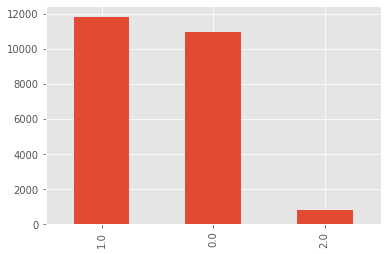

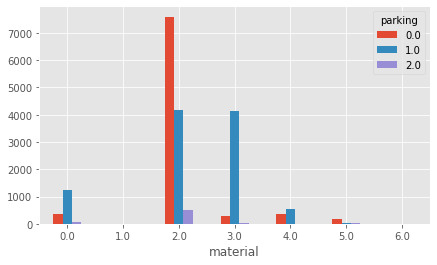

In [18]:
#'parking'
all_data['parking'].value_counts().plot(kind='bar')
#not so much information
plot_categorical(all_data,'material','parking')


From this we can see that for example if material is 2, then parking missing value is most likely 0. We did this for most columns and ended up with the following imputaton:

In [ ]:
def fix_missing_value(df):
    #layout, set everythin to 1
    df['layout'].fillna(int(1.0),inplace=True)



    #found correleation between number of stories and balconies,loggias
    df.loc[(df['stories'] < 7.0)&df['loggias'].isna(),'loggias'] = 0
    df.loc[(df['stories'] < 7.0)&df['balconies'].isna(),'balconies'] = 1

    df.loc[((df['stories'] > 12) & (df['stories'] < 16))|((df['stories'] > 17) & (df['stories'] < 24))&(df['loggias'].isna()),'loggias'] = 1
    df.loc[((df['stories'] > 12) & (df['stories'] < 16))|((df['stories'] > 17) & (df['stories'] < 24))&(df['loggias'].isna()),'balconies'] = 0


    #use the correleation between balconies and loggias to replace nans,
    df.loc[(df['loggias'] == 0.0 )& df['balconies'].isna(),'balconies'] = 1
    df.loc[(df['balconies'] == 0.0 )& df['loggias'].isna(),'loggias'] = 1
    df.loc[(df['loggias'] > 0.0 )& df['balconies'].isna(),'balconies'] = 0
    df.loc[(df['balconies'] > 0.0 )& df['loggias'].isna(),'loggias'] = 0

    #use correlation between material and ceiling groups
    ceiling_under_2 = len(df[((df['material'] == 4)|(df['material'] == 3)) & df['ceiling'].isna()])
    sample = df[df['ceiling'] < 2.6]['ceiling'].sample(n=ceiling_under_2,replace=True).to_numpy()
    df.loc[((df['material'] == 4)|(df['material'] == 3)) & (df['ceiling'].isna()),'ceiling'] = sample
    #use corelation between condition and ceiling groups
    ceiling_under_2 = len(df[(df['condition'] == 1) & df['ceiling'].isna()])
    sample = df[df['ceiling'] < 2.6]['ceiling'].sample(n=ceiling_under_2,replace=True).to_numpy()
    df.loc[(df['condition'] == 1) & df['ceiling'].isna(),'ceiling'] = sample


    #use correleation betwwen ceiling and area
    ceiling_over_3 = len(df[(df['area_total'] > 104)&(df['ceiling'].isna())])
    sample = df[df['ceiling'] > 3.0]['ceiling'].sample(n=ceiling_over_3,replace=True).to_numpy()
    df.loc[(df['area_total'] > 104)&(df['ceiling'].isna() ),'ceiling'] = sample

    ceiling_over_3 = len(df[(df['area_total'] > 75)&(df['ceiling'].isna())])
    sample = df[df['ceiling'] > 2.95]['ceiling'].sample(n=ceiling_over_3,replace=True).to_numpy()
    df.loc[(df['area_total'] > 75)&(df['ceiling'].isna() ),'ceiling'] = sample

    ceiling_under_2 = len(df[(df['area_total'] < 55)&(df['ceiling'].isna())])
    sample = df[df['ceiling'] < 2.8]['ceiling'].sample(n=ceiling_under_2,replace=True).to_numpy()
    df.loc[(df['area_total'] < 55)&(df['ceiling'].isna() ),'ceiling'] = sample

    #seller
    #use correleation between seller and new
    df.loc[(df['new'] == 1 )& df['seller'].isna(),'seller'] = 3

    #use correleation between seller and constructed
    df.loc[(df['constructed'] > 2018)& df['seller'].isna(),'seller'] = 3
    df.loc[(df['constructed'] < 1990)& df['seller'].isna(),'seller'] = 1

    #use correleation between seller and stories
    df.loc[(df['stories'] > 17)& df['seller'].isna(),'seller'] = 3
    df.loc[(df['stories'] < 9)& df['seller'].isna(),'seller'] = 1

    #use correleation between seller and district
    df.loc[((df['district'] == 3)|(df['district']==6))& df['seller'].isna(),'seller'] = 1
    df.loc[((df['district'] == 11)|(df['district']==2))& df['seller'].isna(),'seller'] = 3

    #conditon
    #use correleation between condition and new
    df.loc[(df['new'] == 1)& df['condition'].isna(),'condition'] = 0

    #use correleation between condition and constructed year
    df.loc[(df['constructed'] >= 2017)& df['condition'].isna(),'condition'] = 0
    df.loc[(df['constructed'] <= 1989)& df['condition'].isna(),'condition'] = 1

    #material
    #use correlation between material and district
    df.loc[(df['district'] == 3)& df['material'].isna(),'material'] = 3

    #use correleation between material and constructed year
    df.loc[((df['constructed'] > 1970)& (df['constructed'] <= 1989))&df['material'].isna(),'material'] = 3
    df.loc[(df['constructed'] <= 1970)&df['material'].isna(),'material'] = 0

    #use correleation between stories and material
    df.loc[(df['stories'] < 7)& df['material'].isna(),'material'] = 0
    df.loc[((df['stories'] > 7)&(df['stories'] < 9))& df['material'].isna(),'material'] = 3

    #use correleation between conditon and material
    df.loc[(df['condition'] == 3)& df['material'].isna(),'material'] = 3
    df.loc[(df['condition'] == 0)& df['material'].isna(),'material'] = 2

    #use correleation between parking and material
    df.loc[((df['parking'] == 3)|(df['parking'] == 2))& df['material'].isna(),'material'] = 2

    #user correlation between area and material
    df.loc[(df['area_total'] > 104)& df['material'].isna(),'material'] = 2

    #parking
    #use coreletion between parking and material
    df.loc[((df['material'] == 0)|(df['material'] == 3))& df['parking'].isna(),'parking'] = 1

    #use correleation between stories and parking
    df.loc[((df['stories'] > 30))& df['parking'].isna(),'parking'] = 0
    df.loc[((df['stories'] > 7)&(df['stories'] < 9))& df['parking'].isna(),'parking'] = 1

    #use correleation between radius and parking
    df.loc[(df['radius'] < 0.0547)& df['parking'].isna(),'parking'] = 0
    df.loc[(df['radius'] > 0.251)& df['parking'].isna(),'parking'] = 1

    #windows_court and windows_street
    #windows_street and balconies
    df.loc[(df['balconies'] == 2)& df['windows_street'].isna(),'windows_street'] = 1

    #windows street and area
    df.loc[(df['area_total'] > 106)& df['windows_street'].isna(),'windows_street'] = 1
    df.loc[(df['area_total'] < 47)& df['windows_street'].isna(),'windows_street'] = 0

    #windwos_street and stories
    df.loc[(df['stories'] > 40)& df['windows_street'].isna(),'windows_street'] = 1
    df.loc[(df['stories'] < 9)& df['windows_street'].isna(),'windows_street'] = 0

    #windows_street and windows_court
    df.loc[(df['windows_street'] == 0)& df['windows_court'].isna(),'windows_court'] = 1

    df.loc[((df['windows_street'] == 1)& (df['area_total'] > 75)) & df['windows_court'].isna(),'windows_court'] = 1
    df.loc[((df['windows_street'] == 1)& (df['area_total'] < 47)) & df['windows_court'].isna(),'windows_court'] = 0

    #balconies
    #balconies and stories
    df.loc[((df['stories'] >= 12)& (df['area_total'] <= 16)) & df['balconies'].isna(),'balconies'] = 0
    df.loc[(df['stories'] < 7) & df['balconies'].isna(),'balconies'] = 1
    df.loc[((df['stories'] > 17)& (df['area_total'] <= 24)) & df['balconies'].isna(),'balconies'] = 0

    #matrial and balconies
    df.loc[(df['material'] == 0) & df['balconies'].isna(),'balconies'] = 1
    df.loc[(df['material'] == 2) & df['balconies'].isna(),'balconies'] = 0

    #balconies and constructed
    df.loc[(df['constructed'] < 1970) & df['balconies'].isna(),'balconies'] = 1
    df.loc[(df['constructed'] > 2018) & df['balconies'].isna(),'balconies'] = 0

    #loggias
    #loggias and balconies
    df.loc[(df['balconies'] == 0) & df['loggias'].isna(),'loggias'] = 1
    df.loc[(df['balconies'] > 0) & df['loggias'].isna(),'loggias'] = 0

    #loggias and stories
    df.loc[(df['stories'] < 7) & df['loggias'].isna(),'loggias'] = 0
    df.loc[((df['stories'] >= 17)& (df['area_total'] <= 24)) & df['loggias'].isna(),'loggias'] = 1

    #bathrooms shared, bathroomes private

    #loggias and blaconies



    return df

However this and other imputation techniques didn't make our models perform better. So we ended up with letting the models handle the missing values themselves. This means that the data had to be adjusted to each model. For example for cat_boost we had to replace all missing values with a string and for XgbBoost we had to replace all missing numerical values with the mean of each column and one_hot_encode the categorical features.
LightGBM was really good with missing values and accepted to just send in data with nan's. It was some work with these adjustments, but we think it was the best solution for our model.

## **Models/predictors**
To solve the task of predicting the house prices we wanted to use several different predictors.

### **XGBoost**
The first one we tried was Extreme Gradient Boosting, XGBoost. This is a specific implementation of gradient boosting that uses second-order gradients and an advanced regularization to achieve good results. To start with, we ran the default version XGBoost that gave good results right away. XGBoost does not handle categorical values. The solution we chose for this was to one-hot-encode all the categorical values.

### **LightGBM**
The next one we wanted to try was Light Gradient Boosting Machine, LightGBM. This is, as the name suggests, another type of gradient boosting. It uses some different methods from XGBoost to predict. It also has the property that it handles categorical variables without any form for encoding. Further, it even handles NAN-values. This means that we could send the data straight into the algorithm without one-hot-encoding or handling missing data.

### **CATBoost**
We also use CATBoost. This is a gradient boosting that works especially well on categorical data. Since we have a lot of categorical values this algorithm fits us well.

### **RandomForest**
Random Forest is an ensemble learning algorithm that uses a multitude of decision trees to predict.

### **GradientBoosting**
Lastly, we also utilize Gradient Boosting which is the sklearn version of a Gradient Boosting algorithm.

### **Hyperparameter Tuning**
For all of these algorithms we used optuna in combination with k-fold cross validation to optimize the hyperparameters.

### **Stacking or weights**
After testing each of the models by themselves and achieving good results, we wanted to stack them. Initially we did this by just passing an average of the predictions from the models. After this we tried weighting them by hand to achieve better results. Lastly, we utilized stacking with out-of-fold predictions and a meta-model (linear regression).

The stacking solution together with all the five models  can be seen in the short notebook. We feel like showing this is sufficient number of predictors (5). However we can show how we tuned the weights manually. First we defined all the models with hyperparameters and set kaggle = False. Then we got out local scores (not k-fold predictions) and weighted the final delivery based on these local scores. Here is the best weighted attempt:

In [ ]:
XGB_model = xgb.XGBRegressor(n_estimators = 3000,eta = 0.2,subsample=0.8)
Y = np.log(Y)/np.log(15)
XGB_model.fit(data,Y)
result_XGB = XGB_model.predict(data_test)
print('1 of 4 done')

XGB_model = xgb.XGBRegressor(n_estimators = 5000,eta = 0.1,subsample=0.6)
XGB_model.fit(data,Y)
result_XGB_2 = XGB_model.predict(data_test)
print('2 of 4 done')

lightGBM_model = lgb.LGBMRegressor(
categorical_feature=(0,1,2,3,4,5,6,7,8,9,10,11,12,13),
num_leaves=9**2,
max_depth=9,
random_state=42,
metric='rmsle',
num_iterations=2000,
learning_rate=0.09,
bagging_freq = 5,
bagging_fraction = 0.8)

lightGBM_model.fit(data_train_focus_light,Y,categorical_feature=(0,1,2,3,4,5,6,7,8,9,10,11,12,13))
result_light = lightGBM_model.predict(data_test_focus_light)
print('3 of 4 done')

lightGBM_model = lgb.LGBMRegressor(
categorical_feature=(0,1,2,3,4,5,6,7,8,9,10,11,12,13),
num_leaves=7**2,
max_depth=7,
random_state=50,
metric='rmsle',
num_iterations=4000,
learning_rate=0.08,
bagging_freq = 10,
bagging_fraction = 0.6)

lightGBM_model.fit(data_train_focus_light,Y,categorical_feature=(0,1,2,3,4,5,6,7,8,9,10,11,12,13))
result_light_2 = lightGBM_model.predict(data_test_focus_light)


prediction_kaggle = (0.1*result_light + 0.3*result_XGB + 0.2*result_light_2 + 0.4*result_XGB_2)

prediction_kaggle = 15**prediction_kaggle
submission = pd.DataFrame()
submission['id'] = test_id
submission['price_prediction'] = prediction_kaggle
submission.to_csv('submission_XGB_EDA.csv', index= False)

#scored 0.15365 on kaggle

## **Feature engineering**
We have done a lot of feature engineering, both with making new features and finding out which features works best with the different models. We have already explained that som features like area_kitchen and area_living was not used. Here we will explain some of the most important findings we did regarding feature engineering.

### **Location location location**
There is a saying in real estate that location is everything. For us in this challenge it was not far away from the truth.
#### **Additional data**
In the end of this project we started to think about acquiring additional data. As We said in our domain knowledge we knew that parks, metro and schools was important in Moscow.
Thats why we found the cordinates of all metro stations in moscow, the most popular parks and the most popular schools.
This data is in the additional csv files in this delivery.
- attractions_cordinates.csv
    - searched for most popular attractions on google
    - found coordinates manually from google maps
- metro_cordinates.csv
    - used the following link: https://en.wikipedia.org/wiki/List_of_Moscow_Metro_stations
    - removed all other data and kept coordinates
    - gave each coordinate an unique numberand removed the name to simplify
- parks_cordinates.csv
    - used this link: https://theculturetrip.com/europe/russia/articles/the-best-parks-in-moscow/
    - Found all parks coordinates by searching in google maps
    - added som additional parks by finding green areas on google maps
- school_cordinates.csv
    - used following link: https://www.goodschoolsguide.co.uk/international/russia/moscow/best-schools
    - Found all coordinates by searching on google maps
- train_cordinates.csv
    - used following link: https://www.mos.ru/en/news/item/34183073/
    - found all coordinates by searching for names on google maps.

This data was used to create different features like distance to closest and name of the closest (categorical feature) for all the datasets. However after testing we ended up with distance to the closest metro station, name of closest park and name of closest school. Below is the functions which we used to do this.

In [ ]:
def closest_park(df):
    parks = pd.read_csv('../data/parks_cordinates.csv')
    parks = convert_from_coordinates_to_lat_long(parks)

    df = find_closest(df,parks,'park')

    return df

def closest_school(df):
    schools = pd.read_csv('../data/school_cordinates.csv')
    schools = convert_from_coordinates_to_lat_long(schools)

    df = find_closest(df,schools,'school')

    return df

def closest_metro(df):
    metroes = pd.read_csv('../data/metro_cordinates.csv')
    metroes = convert_from_coordinates_to_lat_long(metroes,metro=True)

    df = find_closest(df, metroes,'metro_station')
    return df

def find_closest(df,df_with_coordinates,text):
    """finds closets location for each location in df to all the locations in df_with_coordinates"""
    df[['closest_' + text,'distance_' + text]] = df.apply(closest,args=(df_with_coordinates,text),axis=1)
    df['closest_' + text] = df['closest_' + text].astype(float)
    return df

def closest(df, list_of_coordinates_and_category,text):
    if df.id%1000==0:
        print(df.id)
    """finds the closets coordinate in list of coordinates and the given coordinate"""
    point= df[['latitude','longitude']].to_numpy()
    list_of_coordinates_and_category['distances'] = list_of_coordinates_and_category.apply(calculate_distance,args=(point[0],point[1]),axis=1)
    shortest_row = list_of_coordinates_and_category['distances'].idxmin()
    return list_of_coordinates_and_category.iloc[shortest_row][[text,'distances']]
    #calculate_distance(coordinate, list_of_coordinates_and_category[['longitude','latitude']])

def calculate_distance(df,pointlat,pointlong):
    """calculates the distance between two points"""
    distance = np.sqrt((pointlat-df['latitude'])**2 + (pointlong-df['longitude'])**2)
    return distance

def convert_from_coordinates_to_lat_long(df,metro=False):
    if metro:
        df[['latitude','longitude']] = df['coordinates'].str.split(" ",1, expand=True)
        df[['latitude','longitude']] = df[['latitude','longitude']].astype(float)
    else:
        df[['latitude','longitude']] = df['coordinates'].str.split(',',1, expand=True)
        df[['latitude','longitude']] = df[['latitude','longitude']].astype(float)

    return df

For example name of the closest metro station was not good because there was over 200 different metro_stations.
#### **Radius**
One of the first things we added was the radius, because the models struggled to get information from lat,long. We did this by defining the centrum of moscow and adding the radius from this point to all the rows. We did this with the following function:

In [ ]:
def add_radius(df):
    #adds radius column to dataframe
    df['radius'] = np.sqrt((df['latitude']-55.75)**2 + (df['longitude']-37.55)**2)
    return df

However we still felt that the models didn't use the location good enough. That why we decided to add several other radius points aswell.  In total we will now have 17 columns which contains the radius to one point in moscow.
To utilize this even better we decided that these new radius-points should be the coridnates of the popular parks and schools. After adding this we felt that the models managed to use the location even better.

The remove_duplicates() function removes schools and parks which is really close to each other, this was done to not have radius points to close to eachother. Found how close they were by plotting them all on google maps and chosing the ones we think was best.

Code used to add more radius points:

In [ ]:
def add_parks_and_schools(df):
    """with parks we are going to add all as radius to different parks, will also do this with schools"""
    parks = pd.read_csv('../data/parks_cordinates.csv')
    schools = pd.read_csv('../data/school_cordinates.csv')
    parks = convert_from_coordinates_to_lat_long(parks)
    schools = convert_from_coordinates_to_lat_long(schools)

    total = remove_duplicates(parks,schools)

    for i, cordinate in enumerate(total):
        df['radius'+ str(i)] = np.sqrt((cordinate[0]-df['latitude'])**2 + (cordinate[1]-df['longitude'])**2)
        df = add_direction(df, latitude = cordinate[0], longitude = cordinate[1], name = str(i))


    return df



def remove_duplicates(parks,schools):
    """we want to remove places which is really close"""
    schools = schools.drop(schools[schools['school']==5].index)
    schools = schools.drop(schools[schools['school']==7].index)
    schools = schools.drop(schools[schools['school']==3].index)
    parks = parks.drop(parks[parks['park']==4].index)
    parks = parks.drop(parks[parks['park']==14].index)

    return np.concatenate((schools[['latitude','longitude']].to_numpy(),parks[['latitude','longitude']].to_numpy()))

As you can see in the above code there is something called add direction, we will get to this now.

#### **Direction and Angle**
To make sure that the models understand where the different apartments is located we decided to add a direction from the inital radius point (centrum). This was before we added the other radiuses.
We called this feature direction and it had eight different categories. It improved our score a little, but it was first when we ditched direction and only had the angle in radians as a numerical feature that this realy helped us. Here is how we added direction and angle.

In [ ]:
def add_direction(df, latitude=55.75, longitude=37.56,name=''):
    """adds direction to dataframe, can be one of eight categories (N,S,W,E)"""
    #straight up (north)
    normal_vector = np.array([0,1])
    #normal_vector = np.tile(normal_vector,(df.shape[0],1))
    #normal_vector = normal_vector.reshape((2,-df.shape[0]))
    temp = pd.DataFrame()
    temp['latitude'] = df['latitude']-latitude
    temp['longitude'] = df['longitude']-longitude


    apartment_vector = temp[['latitude','longitude']].to_numpy()


    #print(np.shape(apartment_vector), np.shape(normal_vector))
    angles = []
    for vector in apartment_vector:
        if vector[0] < 0:
            temp_angle = -angle_between(vector,normal_vector)
        else:
            temp_angle = angle_between(vector,normal_vector)
        angles.append(temp_angle)

    angles = [element * 10 for element in angles]


    angles_series = pd.Series(np.array(angles))
    #angles_series.plot.hist()

    df['angle'+name] = angles_series
    max = df['angle'+name].max()
    min = df['angle'+name].min()
    bins = [min,min*7/8,min*5/8,min*3/8,min/8,max/8,max*3/8,max*5/8,max*7/8,max]
    rounded_bins = [element for element in bins]
    #print(rounded_bins)
    direction = pd.cut(df['angle'+name], bins= rounded_bins,labels=['S','SW','W','NW','N','NE','E','SE','S'],ordered=False)
    df['direction'+name] = direction
    return df

def unit_vector(vector):
    """returns the unit vector if the vector"""
    return vector/np.linalg.norm(vector)

def angle_between(v1,v2):
    """returns angle between two vectors in radian"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u,v2_u),-1,1))

After we added the other radius columns, we kept the angel for all points(columns) as this affected the result positveliy.

#### **Clustering**
The last thing we did was clustering the data into 100 clusters instead of using districts. This improved our score because the models liked smaller clusters of location instead of the generally larger districts. We liked the clusters som much that used grouping to add cluster_mean_price and cluster_sqr_price. The models were now able to use the location of apartments properly. This wad done by the following code:

In [ ]:
def cluster_geo_data(df,df_test):
    from sklearn.cluster import KMeans
    k_means = KMeans(n_clusters = 100, max_iter = 1000, init='k-means++')

    lat_long_pairs = df[['latitude','longitude']]
    lat_long_pairs_test = df_test[['latitude','longitude']]
    target_data = np.log(df.price)/np.log(15)

    k_means.fit(lat_long_pairs,sample_weight = target_data)
    df['cluster_number'] = k_means.predict(lat_long_pairs)
    df_test['cluster_number'] = k_means.predict(lat_long_pairs_test)

    return df, df_test

#modfied version of grouping data which adds square price and mean price for cluster
def group_by_feature_and_price(df, feature, data_train = pd.DataFrame()):
    #makes a new column with the mean price for each group to all rows
    if data_train.empty:
        grouped = df.groupby([feature])

        mean_price = grouped['price'].mean()
        mean_sqr = grouped['area_total','price'].mean()
        mean_sqr['price'] = mean_sqr['price']/mean_sqr['area_total']
        df_merged = pd.merge(df,mean_price, on=feature, how='left')
        df_merged_sqr = pd.merge(df,mean_sqr, on=feature, how='left')

        column_name = str(feature + '_price')
        column_name_sqr = str(feature + '_sqr_price')
        df[column_name_sqr] = df_merged_sqr['price_y']
        df[column_name] = df_merged['price_y']
    else:
        grouped = data_train.groupby([feature])

        mean_price = grouped['price'].mean()
        mean_sqr = grouped['area_total','price'].mean()
        mean_sqr['price'] = mean_sqr['price']/mean_sqr['area_total']
        print(mean_sqr)
        df_merged = pd.merge(df,mean_price, on=feature, how='left')
        df_merged_sqr = pd.merge(df,mean_sqr, on=feature, how='left')

        column_name = str(feature + '_price')
        column_name_sqr = str(feature + '_sqr_price')
        df[column_name_sqr] = df_merged_sqr['price']
        df[column_name] = df_merged['price']
    return df

### **other features**
We did some other features aswell which can be seen in the short notebook. These include:
- adding a penthouse function which rewards apartments high up in high buildings
- adding a feature which tells how high up an apartment is in a building

### **Chosing features**
when testing different models we tested different features for each model. However in the end the models liked the same features.
In the short notebook you can see some of the different attempts made, we tested mostly localy which gave quite same tendencies as uploading to kaggle.

Here is the features we ended up using in the final notebook:

In [ ]:
    focus_xgb = ['seller', 'area_total','floor',
       'rooms', 'ceiling', 'bathrooms_shared', 'bathrooms_private',
       'windows_court', 'windows_street', 'balconies', 'loggias', 'condition',
       'phones','new',
       'constructed', 'material', 'stories',
       'elevator_without', 'elevator_passenger', 'elevator_service', 'parking',
       'radius', 'radius0', 'radius1', 'radius2',
       'radius3', 'radius4', 'radius5', 'radius6', 'radius7', 'radius8',
       'radius9', 'radius10', 'radius11', 'radius12', 'radius13', 'radius14',
       'radius15', 'closest_school', 'closest_park',
       'distance_metro_station',
        'cluster_number','penthouse', 'cluster_number_price','cluster_number_sqr_price', 'angle','high_up','angle0','angle1','angle2','angle3','angle4','angle5','angle6','angle7','angle8','angle9','angle10','angle11','angle12','angle13','angle14','angle15']
    xgb_categorical = ['seller', 'windows_court', 'windows_street', 'condition', 'new', 'phones',
                      'material', 'elevator_without', 'elevator_passenger', 'elevator_service', 'parking','cluster_number','closest_school',
                      'closest_park',]

    focus_light = ['seller', 'area_total','floor',
       'rooms', 'ceiling', 'bathrooms_shared', 'bathrooms_private',
       'windows_court', 'windows_street', 'balconies', 'loggias', 'condition',
       'phones','new',
       'constructed', 'material', 'stories',
       'elevator_without', 'elevator_passenger', 'elevator_service', 'parking',
       'radius', 'radius0', 'radius1', 'radius2',
       'radius3', 'radius4', 'radius5', 'radius6', 'radius7', 'radius8',
       'radius9', 'radius10', 'radius11', 'radius12', 'radius13', 'radius14',
       'radius15', 'closest_school', 'closest_park',
       'distance_metro_station',
       'cluster_number','penthouse', 'cluster_number_price','cluster_number_sqr_price', 'angle','high_up','angle0','angle1','angle2','angle3','angle4','angle5','angle6','angle7','angle8','angle9','angle10','angle11','angle12','angle13','angle14','angle15']

    #heating 24
    light_features = (0,3,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,38,39,41)

    focus_cat = ['seller', 'area_total','floor',
       'rooms', 'ceiling', 'bathrooms_shared', 'bathrooms_private',
       'windows_court', 'windows_street', 'balconies', 'loggias', 'condition',
       'phones','new',
       'constructed', 'material', 'stories',
       'elevator_without', 'elevator_passenger', 'elevator_service', 'parking',
       'radius', 'radius0', 'radius1', 'radius2',
       'radius3', 'radius4', 'radius5', 'radius6', 'radius7', 'radius8',
       'radius9', 'radius10', 'radius11', 'radius12', 'radius13', 'radius14',
       'radius15', 'closest_school', 'closest_park',
       'distance_metro_station',
       'cluster_number','penthouse', 'cluster_number_price','cluster_number_sqr_price', 'angle','high_up','angle0','angle1','angle2','angle3','angle4','angle5','angle6','angle7','angle8','angle9','angle10','angle11','angle12','angle13','angle14','angle15']
    cat_feature = [0,7,8,9,10,11,12,13,14,15,17,18,19,20,38,39,41]

The only difference is that some of the models have different defintions of which features is categorical. This was only minor adjustments, but we found some difference and though it was interesting that there was a difference, so we decided to keep this. An example is that only lightGBM has 'rooms' as a categorical feature.




